In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
test_images.shape

(10000, 28, 28)

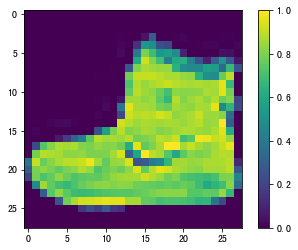

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

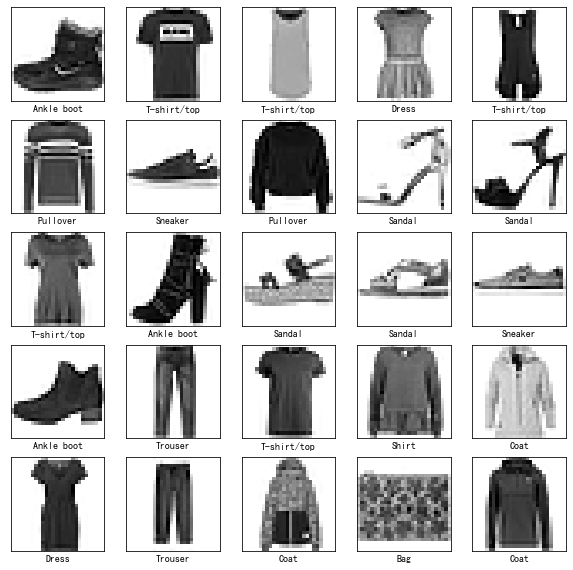

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0897 - accuracy: 0.6590
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6412 - accuracy: 0.7692
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5667 - accuracy: 0.7972
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5244 - accuracy: 0.8142
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4964 - accuracy: 0.8246
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4765 - accuracy: 0.8320
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4609 - accuracy: 0.8369
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4493 - accuracy: 0.8415
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4397 - accuracy: 0.8461
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.431

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4582 - accuracy: 0.8340

Test accuracy: 0.8339999914169312


In [20]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test_images)

In [22]:
predictions[0]

array([1.11746601e-06, 1.42789425e-08, 9.01681051e-06, 5.31134083e-06,
       6.61790455e-06, 1.50193721e-01, 2.15250693e-05, 2.86764592e-01,
       7.23221945e-03, 5.55765867e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9